# Analysis on Google Play Store Dataset
# Date: 26 July 2025
# Technologies Used: Python, NumPy, Pandas, Matplotlib

##                                  -o) Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##                                  -o) Load dataset

In [32]:
df = pd.read_csv('googleplaystore.csv')

##                                  -o) Basic Information & Cleaning Questions


In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df = df.drop_duplicates() # Drop Duplicate

#### How many rows and columns are there in the dataset?

In [35]:
print('Total Numbers of Rows : ',df.shape[0])
print('Total Numbers of Colume : ',df.shape[1])

Total Numbers of Rows :  10358
Total Numbers of Colume :  13


####  Which columns have missing values, and what is the count of those missing values?

In [36]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


####  How would you handle the null values — by dropping or filling them? Justify your approach.

In [37]:
print("I can handle null values by doing drop or fill methodology but it's totally depends on condition of Question")

I can handle null values by doing drop or fill methodology but it's totally depends on condition of Question


#### What are the minimum, maximum, and average values of the Rating column?

In [38]:
# print(df['Rating'].isnull().sum())
print(f"Max value in Rating Colume is {df['Rating'].max()}",
      f"Min value in Rating Colume is {df['Rating'].min()}",
      f"Average value in Rating Colume is {df['Rating'].mean()}",sep='\n')

Max value in Rating Colume is 19.0
Min value in Rating Colume is 1.0
Average value in Rating Colume is 4.18954233666929


#### How would you convert the values in the Installs column into numeric format?

In [39]:
df_1 = df.copy()
drop_it = df_1[df_1['Installs'].str.contains('Free',case=False)].index
# print(drop_it[0])
df_1[df_1.index == drop_it[0]]
df_1 = df_1.drop(drop_it,axis=0)
df_1[df_1.index == drop_it[0]]
df_1['Installs'] = df_1['Installs'].str.replace(r'[+,]','',regex=True).astype(int)
df_1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int64

#### How would you remove the "$" sign from the Price column and convert the values into float?

In [40]:
drop_it = df_1[df_1['Price'].str.title() == 'Everyone'].index
# print(drop_it)
df_1.drop(drop_it,axis=0,inplace=True)
df_1['Price'] = df_1['Price'].str.replace('$','').astype(float)
print(df_1['Price'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10357, dtype: float64


#               -o)  Exploratory Data Analysis (EDA)

#### What are the top 5 categories with the highest number of apps?

In [41]:
df_2 = df.copy()
drop_it = df_2[df_2['Category'] == '1.9'].index
# print(drop_it[0])
# print(df_2[df_2.index == drop_it[0]])
df_2.drop(drop_it,axis=0,inplace=True)
# print(df_2[df_2.index == drop_it[0]])
print(df_2['Category'].value_counts().sort_values(ascending=False).head(5))

Category
FAMILY      1943
GAME        1121
TOOLS        843
BUSINESS     427
MEDICAL      408
Name: count, dtype: int64


#### What is the percentage distribution of Free and Paid apps?

In [42]:
# Make sure the column is string type
df_2['Price'] = df_2['Price'].astype(str)

# Now safely filter rows that accidentally have 'Everyone'
drop_it = df_2[df_2['Price'].str.title() == 'Everyone'].index
# print(drop_it)
# Drop them
df_2.drop(drop_it, axis=0, inplace=True)

# Clean '$' and convert back to float
df_2['Price'] = df_2['Price'].str.replace('$', '', regex=False)
df_2['Price'] = pd.to_numeric(df_2['Price'], errors='coerce')

# Calculate stats
total_apps = len(df_2)
free = len(df_2[df_2['Price'] == 0])
paid = len(df_2[df_2['Price'] != 0])

print('Total Apps', paid + free)
print('Percentage for Free Apps is ', (free / total_apps) * 100)
print('Percentage for Paid Apps is ', (paid / total_apps) * 100)


Total Apps 10357
Percentage for Free Apps is  92.61369122332722
Percentage for Paid Apps is  7.386308776672782


#### Which are the 5 most expensive apps? What are their categories and ratings?

In [43]:
# cleaned_df = df_2.sort_values(by='Price', ascending=False).head(5)[['App','Category','Rating','Price']]
High_Price = df_2['Price'].value_counts().sort_index(ascending=False).head(5).index
cleaned_df = df_2[df_2['Price'].isin(High_Price)][['App','Category','Rating','Price']].sort_values(by=['Price'],ascending=False)
# print(cleaned_df)
cleaned_df['Rating'] = cleaned_df['Rating'].fillna(cleaned_df['Rating'].mean(),axis=0)
def trunc_to_1_Dec(x):
    x = x*10
    x = int(x)
    return x/10
cleaned_df['Rating'] = cleaned_df['Rating'].apply(lambda x : trunc_to_1_Dec(x) )
print(cleaned_df.head(5))

                           App   Category  Rating   Price
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6  400.00
4197    most expensive app (H)     FAMILY     4.3  399.99
4362                💎 I'm rich  LIFESTYLE     3.8  399.99
5351                 I am rich  LIFESTYLE     3.8  399.99
5354            I am Rich Plus     FAMILY     4.0  399.99


#### Which category has the highest average rating?

In [44]:
category_count = df_2['Category'].value_counts()
# print(category_count)
individual_category_mean = []
# df_2['Rating'] = df_2['Rating'].fillna(df_2['Rating'].mean() , axis=0)
# print(df_2[df_2['Category'] == 'FAMILY']['Rating'].isnull().sum())
# x = df_2[df_2['Category'] == 'FAMILY']['Rating'].fillna(df_2[df_2['Category'] == 'FAMILY']['Rating'].mean(),axis=0)
# print(x.mean())
for i in category_count.index: 
    x = df_2[df_2['Category'] == i]['Rating'].fillna(df_2[df_2['Category'] == i]['Rating'].mean(),axis=0)
    individual_category_mean.append(x.mean())
individual_category_data = pd.DataFrame(category_count.index)
individual_category_data['Mean'] = individual_category_mean
# print(individual_category_data)
Most_Rated_Category = individual_category_data.sort_values(by='Mean',ascending=False).head(1).values
print('Most Rated Category is :',Most_Rated_Category[0][0],'with rating',Most_Rated_Category[0][1])
# or
# print(df_2['Rating'])
df_2['Rating'] = df_2.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean())) # ye values put kerke mean deta hai size same of series
# print(df_2['Rating'])
print(df_2.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(1)) 
# print(df_2.groupby('Category')['Rating'].apply(lambda x: x.mean())) # ye direct mean deta hai
# or 
# print(df_2.groupby('Category')['Rating'].mean()) 

Most Rated Category is : EVENTS with rating 4.435555555555556
Category
EVENTS    4.435556
Name: Rating, dtype: float64


#### Which category has the highest average number of installs?

In [45]:
# print(df_2[['Installs','Category']].isnull().sum())
category_count = df_2['Category'].value_counts()
# print(category_count)
# print(df_2['Installs'].shape)
df_2['Installs'] = df_2['Installs'].str.replace('[,+]' , '',regex=True).astype(int)
# print(df_2['Installs'].shape)
individual_category_mean = []

for i in category_count.index: 
    x = df_2[df_2['Category'] == i]['Installs'].mean()
    individual_category_mean.append(x)
individual_category_data = pd.DataFrame(category_count.index)
individual_category_data['Mean'] = individual_category_mean
# print(individual_category_data)
Most_Rated_Category = individual_category_data.sort_values(by='Mean',ascending=False).head(1).values
print('Most Rated Category is :',Most_Rated_Category[0][0],'with installs',Most_Rated_Category[0][1])
# or
category_install_means = df_2.groupby('Category')['Installs'].mean().sort_values(ascending=False)
print(category_install_means.head(1))


Most Rated Category is : COMMUNICATION with installs 65989825.82240437
Category
COMMUNICATION    6.598983e+07
Name: Installs, dtype: float64


##                                  -o) Data Visualization-Based Questions

In [46]:
df_3 = df.copy()
drop_it = df_3[df_3['Category'] == '1.9'].index
df_3 = df_3.drop(drop_it,axis=0)

#### Top 5 categories by app count.

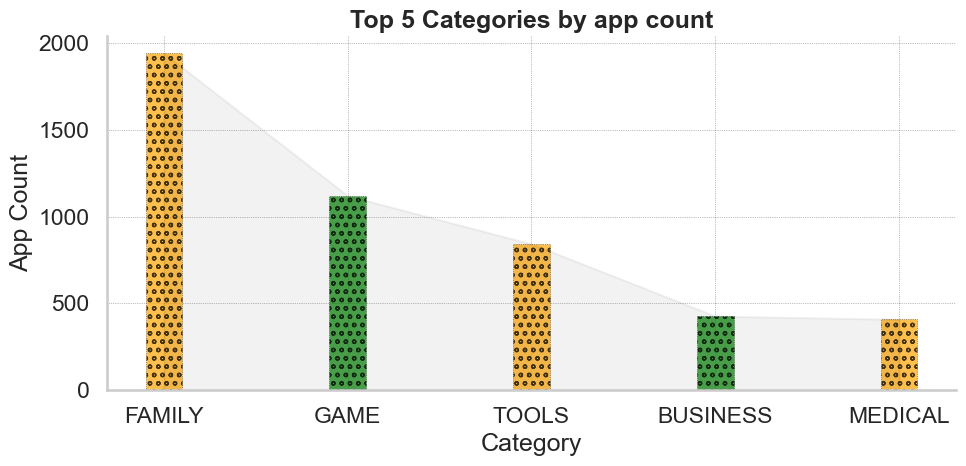

In [47]:
# print(df_3[['Category','App']].isnull().sum()) 
top_category = df_3['Category'].value_counts().sort_values(ascending=False).head(5)# Because all are apps
# or
top_category = df_3.groupby('Category')['App'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))
plt.title('Top 5 Categories by app count',fontweight = 700)
plt.xlabel('Category')
plt.ylabel('App Count')
sns.set_context('talk')
plt.bar(top_category.index , top_category.values ,alpha=0.7, hatch='oo',color =['orange','green'],width = 0.2,edgecolor = 'black',linewidth = 0.5,linestyle = ':')
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
plt.fill_between(top_category.index,top_category.values , alpha = 0.05 , color = 'black')
sns.despine()
plt.savefig('Top_5_Categories_by_app_count.png',dpi=400)
plt.tight_layout()
plt.show()

#### Create a plot that showing the distribution of ratings.

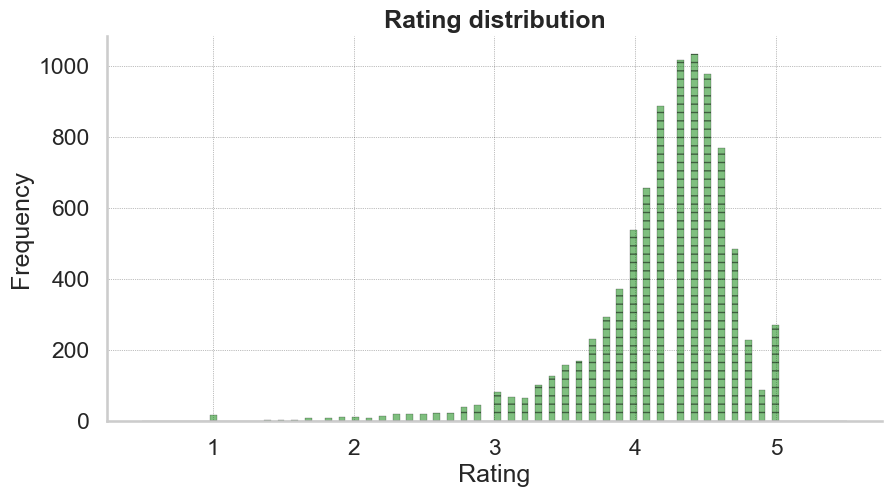

In [48]:
plt.figure(figsize=(10, 5))
plt.title('Rating distribution',fontweight = 700)
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.set_context('talk')
# df_3.dropna(subset=['Rating'],axis=0,inplace=True) # likhu na likhu same hai
plt.hist(df_3['Rating'] , 'auto' , range=(0.5,5.5) ,hatch='--', edgecolor='black',linewidth = 0.3,color = 'g', alpha = 0.5 )
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine()
plt.savefig('Rating_distribution.png',dpi=500)
plt.show()

#### Create a Box-plot that showing of Rating vs Category.

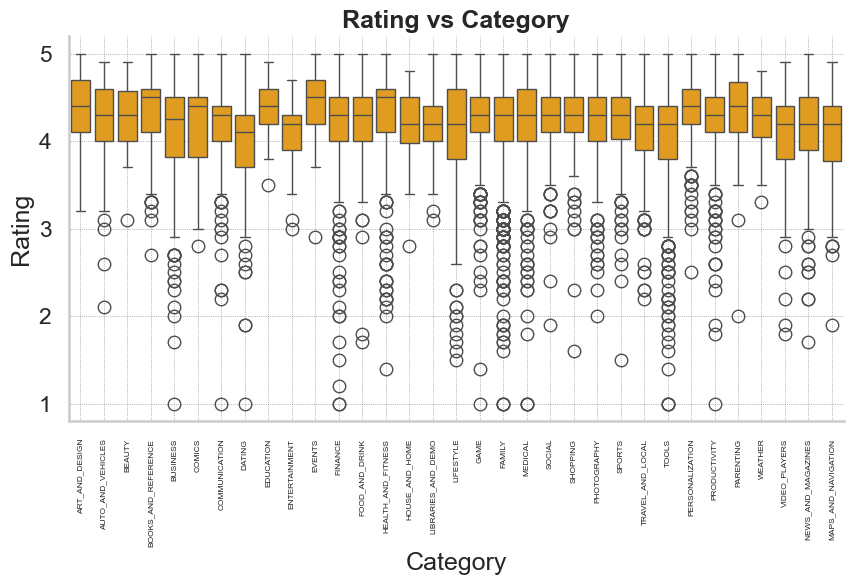

In [49]:
# print(df_3[['Category','Rating']].isnull().sum())
plt.figure(figsize=(10, 5))
plt.title('Rating vs Category',fontweight = 700)
plt.xlabel('Category')
plt.ylabel('Rating')
sns.set_context('talk')
sns.boxplot(data=df_3 , x='Category', y='Rating' , color='orange')
plt.xticks(rotation=90,fontsize = 6)     # 👈 labels rotate ker do
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine()
plt.savefig('Rating_vs_Category.png',dpi=500)
plt.show()


#### Create a plot of Price vs Rating (only for paid apps).

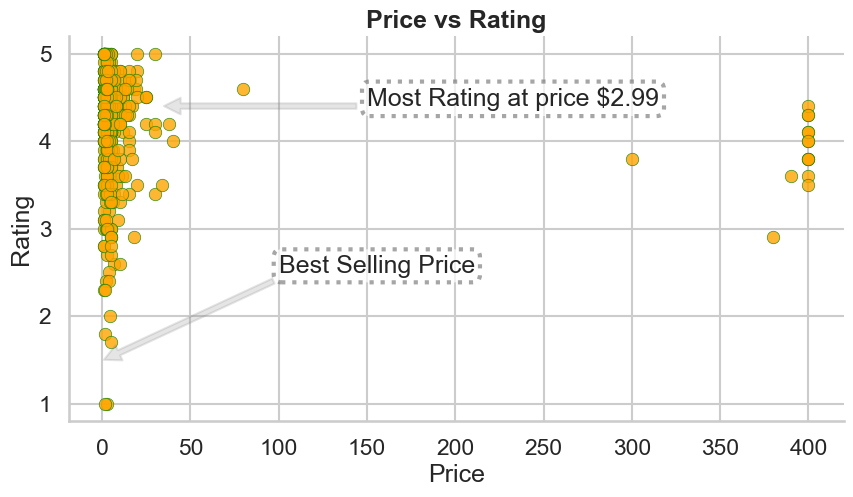

In [50]:
# print(df_3['Price'].shape)
# print(df_3['Price'].dtype)
df_3['Price'] = df_3['Price'].replace('[$]',' ',regex=True).astype(float)
# print(df_3['Price'])
# print(df_3['Price'].shape)
# print(df_3['Price'].dtype)
plt.figure(figsize=(10, 5))
plt.title('Price vs Rating',fontweight = 700)
plt.xlabel('Price')
plt.ylabel('Rating')
sns.set_context('talk')
sns.set_style('whitegrid')
plt.scatter(df_3[df_3['Price'] != 0]['Price'] , df_3[df_3['Price'] != 0]['Rating'] , edgecolors='green' ,color = 'orange' , linewidth = 0.5 , alpha=0.8 )
plt.text(100,2.5,'Best Selling Price',bbox = {
    'linestyle':':','facecolor' : 'white','edgecolor' : 'grey','alpha' : 0.7,'linewidth' : 3,'boxstyle': 'round,pad=0.2,rounding_size=0.3'
})
plt.annotate('' ,xy=(0.99,1.5) , xytext=(97,2.4) ,arrowprops={   
    'facecolor' : 'grey', 'shrink' : 0 , 'edgecolor' : 'grey','alpha':0.2})

plt.text(150,4.4,'Most Rating at price $2.99',bbox = {
    'linestyle':':','facecolor' : 'white' ,'alpha' : 0.7,'linewidth' : 3, 'edgecolor' : 'grey','boxstyle': 'round,pad=0.2,rounding_size=0.3'
})
plt.annotate('' ,xy=(35,4.4) , xytext=(144,4.4) ,arrowprops={   
    'facecolor' : 'grey', 'shrink' : 0 , 'edgecolor' : 'grey','alpha':0.2})
sns.despine()
plt.savefig('Price_vs_Rating.png',dpi=500)
plt.show()

#### Create a pie chart showing the ratio of free vs paid apps.

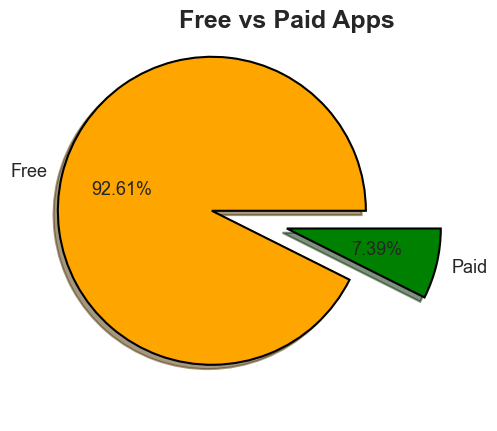

In [51]:
plt.figure(figsize=(10, 5))
plt.title('Free vs Paid Apps',fontweight = 700)
count_type = df_3['Type'].value_counts()
plt.pie(count_type.values , labels=count_type.index ,shadow=True,wedgeprops={"edgecolor" : 'black', 'linewidth' : 1.5},explode=[0.5,0], autopct='%.2f%%',colors=['orange' , 'green'],textprops={'fontsize' : 13})
plt.savefig('Free_vs_Paid.png',dpi=500)
plt.show()


##                                  -o) Advanced/Challenging Questions

In [52]:
df_4 = df.copy()
drop_it = df_4[df_4['Category'] == '1.9'].index
df_4 = df_4.drop(drop_it,axis=0)

#### In which category is the average rating of paid apps higher than that of free apps?

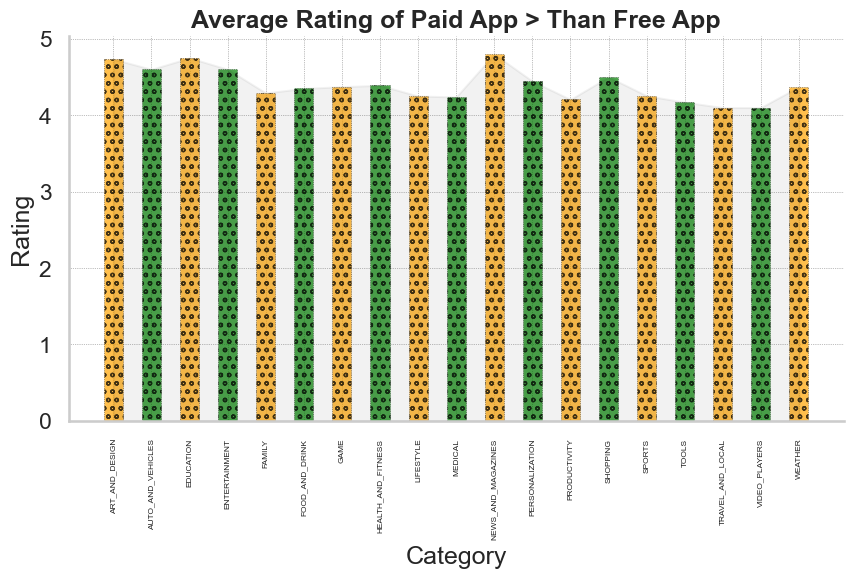

In [53]:
comparision = df_4.pivot_table(index='Category' , columns='Type' , values='Rating' , aggfunc='mean')
comparision.dropna(subset=['Paid'],inplace= True)
comparision = comparision[comparision['Paid'] > comparision['Free']]
plt.figure(figsize=(10,5))
plt.title('Average Rating of Paid App > Than Free App',fontweight = 700)
plt.xlabel('Category')
plt.ylabel('Rating')
sns.set_context('talk')
plt.bar(comparision.index , comparision['Paid'].values ,alpha=0.7, hatch='oo',color =['orange','green'],width = 0.5,edgecolor = 'black',linewidth = 0.5,linestyle = ':')
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
plt.fill_between(comparision.index , comparision['Paid'].values , alpha = 0.05 , color = 'black')
plt.xticks(rotation=90,fontsize = 6)     # 👈 labels rotate ker do
sns.despine()
plt.savefig('Comparision_average_rating.png',dpi=500)
plt.show()


#### Which app has the lowest rating despite having the highest number of installs?

In [54]:
# print(df_4[['Installs','App']].isnull().sum()) # i know rating having many null values so, don't worry I trust on Allah and then myself.
# print(df_4.duplicated().sum())
df_4['Installs'] = df_4['Installs'].str.replace('[,+]' , '' , regex=True).astype(int)
# print(df_4[['App','Rating','Installs']].sort_values(by=['Rating','Installs'] , ascending=[True,False]).head(1))
# or
x = df_4.groupby(['App','Rating'])['Installs'].sum().reset_index()
print('App Name : ',x.sort_values(by=['Rating','Installs'] , ascending=[True,False]).head(1).iloc[0, 0])

App Name :  BJ Bridge Standard American 2018


#### In which categories is the average price of paid apps greater than $10?

In [55]:
df_4['Price'] = df_4['Price'].str.replace('[$]','',regex=True).astype(float)
x = df_4[df_4['Price'] != 0].groupby('Category')['Price'].mean().reset_index()
print(x[x['Price'] > 10][['Category','Price']])

     Category       Price
3    BUSINESS   14.607500
8      EVENTS  109.990000
9      FAMILY   12.945561
10    FINANCE  170.637059
15  LIFESTYLE  124.256316
17    MEDICAL   12.151071


#### Which app has the longest name in terms of character count? What is its rating and category?

In [56]:
print(df_4['App'].isnull().sum())
df_4['Char_count'] = df_4['App'].apply(lambda x : len(x))
df_4['Rating'] = df_4.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))
df_4['Rating'] = df_4['Rating'].apply(lambda x : trunc_to_1_Dec(x))    # trunc_to_1_Dec function creat in ->  line 79
df_4[['App','Category','Rating','Char_count']].sort_values(by=['Char_count'],ascending=False).head(1)


0


,App,Category,Rating,Char_count
1451,"591 housing transactions - renting houses, mid...",HOUSE_AND_HOME,4.1,194


#### Is there any correlation between an app's price and its number of installs (only for paid apps)?

Correlation of Price and Installs is  -0.0207 which is very weak negative correlation


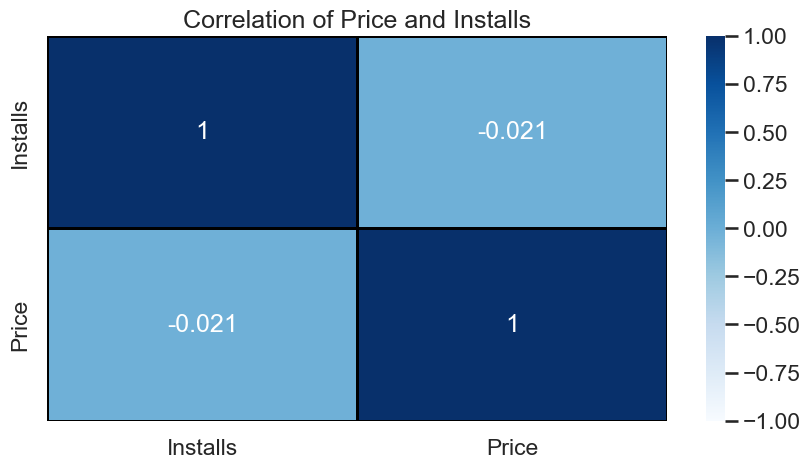

In [57]:
df_5 = df.copy()
dropit = df_5[df_5['Installs'].str.title() == 'Free'].index
# print(dropit)
df_5.drop(dropit , inplace=True)
# print(df_5[['Price','Installs']].isnull().sum())
paid_apps = df_5[df_5['Price'].str.contains('[$]',regex=True)][['Price','Installs','Rating','Category']] # i include more columes for solving Q3
# print(paid_apps)
paid_apps['Price'] = paid_apps['Price'].str.replace('[$]' ,'' ,regex=True).astype(float)
paid_apps['Installs'] = paid_apps['Installs'].str.replace('[,+]' ,'' ,regex=True).astype(int)
corr_value = paid_apps[['Installs','Price']].corr().iloc[0,1] * 10000
corr_value = int(corr_value)
corr_value /= 10000
print('Correlation of Price and Installs is ',corr_value,'which is very weak negative correlation')
plt.figure(figsize=(10, 5))
plt.title('Correlation of Price and Installs')
sns.set_context('talk')
sns.heatmap(data = paid_apps[['Installs','Price']].corr() , annot=True , cmap='Blues' , vmin = -1 , vmax = 1,linewidths=1,linecolor='black')
plt.show()

#### Which aapps that have over 10 million installs but have a rating less than 3.5?

In [58]:
df_5['Installs'] = df_5['Installs'].str.replace('[,+]','',regex=True).astype(int)
print(df_5['Installs'])
# print(df_5['Rating'].isnull().sum())lambda x: x.fillna(x.mean())
df_5['Rating'] = df_5.groupby('Category')['Rating'].transform(lambda x : x.fillna(x.mean()))
print(df_5[(df_5['Installs'] > 10000000) & (df_5['Rating'] < 3.5)][['App','Installs','Rating']].head(1))

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int64
            App  Installs  Rating
3247  My Telcel  50000000     3.1


#### Which category has the highest number of paid apps, but their average rating is poor (less than 3.5)?

In [59]:
# print(paid_apps['Rating'].isnull().sum())
paid_apps['Rating'] = paid_apps.groupby('Category')['Rating'].transform(lambda x : x.fillna(x.mean()))
# print(paid_apps[paid_apps['Rating'].isnull()]['Category']) #These 2 Category have only one paid apps thats why this is remains null means fillna method of vategory mean not replace nan value
paid_apps['Rating'] = paid_apps['Rating'].fillna(paid_apps['Rating'].mean())
# print(paid_apps['Rating'].isnull().sum())
paid_apps_count = paid_apps.groupby('Category')[['Price','Rating']].agg(['count','mean']).sort_values(by=('Price','count'),ascending=False)
print(paid_apps_count)
paid_apps_count.columns = ['_'.join([str(i) for i in col]) for col in paid_apps_count.columns]
# paid_apps_count.drop([('Rating','count'),('Price','mean')],axis=1 , inplace=True)
paid_apps_count.drop(['Price_mean','Rating_count'] , axis=1 , inplace=True)
paid_apps_count.columns = ['Paid_Apps','Rating']
paid_apps_count.reset_index(inplace=True)
print(paid_apps_count[paid_apps_count['Rating'].values < 3.5])

                    Price             Rating          
                    count        mean  count      mean
Category                                              
FAMILY                187   12.945561    187  4.291139
MEDICAL                84   12.151071     84  4.239063
GAME                   83    3.461446     83  4.372727
PERSONALIZATION        82    1.847195     82  4.445455
TOOLS                  78    3.426282     78  4.169841
BOOKS_AND_REFERENCE    28    4.277500     28  4.275000
PRODUCTIVITY           28    8.961786     28  4.205556
COMMUNICATION          27    3.079259     27  4.063636
SPORTS                 24    4.166667     24  4.254545
PHOTOGRAPHY            20    6.111500     20  4.000000
LIFESTYLE              19  124.256316     19  4.250000
FINANCE                17  170.637059     17  3.830769
HEALTH_AND_FITNESS     15    4.290000     15  4.390909
BUSINESS               12   14.607500     12  4.077778
TRAVEL_AND_LOCAL       12    4.162500     12  4.100000
WEATHER   

#### Which categories have a high average price but low installs (indicating low market demand)?

In [60]:
print(df_5[['Price','Installs']].dtypes)
df_5['Price'] = df_5['Price'].str.replace('[$]' ,'' ,regex=True).astype(float)
avg_price = df_5.groupby(['Category'])[['Price','Installs']].agg(['mean','sum'])
# print(avg_price)
avg_price.columns = ['_'.join([str(i) for i in col]) for col in avg_price.columns]
# print(avg_price.columns)
avg_price.drop(['Price_sum','Installs_mean'] , axis=1 , inplace=True)
print(avg_price.sort_values(by=['Price_mean','Installs_sum'] , ascending=[False,True]).head(1))

Price       object
Installs     int64
dtype: object
          Price_mean  Installs_sum
Category                          
FINANCE     8.057861     770348734


#### Which are the 3 apps that have the same name but differ in installs and rating (i.e., duplicate names with different stats)?

In [61]:
print(df_5[['App','Installs','Rating']].isnull().sum())

App         0
Installs    0
Rating      0
dtype: int64


In [62]:
duplicate_data = df_5[df_5.duplicated(['App'] , keep = False)]
print(df_5.duplicated(['App'] , keep = False))  # jaha data hoga waha  duplicate hai

0        False
1         True
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10357, dtype: bool


In [63]:
apps_with_diff_stats  = duplicate_data.drop_duplicates(subset=['App','Installs','Rating'])
print(apps_with_diff_stats )

                                                 App             Category  \
1                                Coloring book moana       ART_AND_DESIGN   
23                            Mcqueen Coloring pages       ART_AND_DESIGN   
36    UNICORN - Color By Number & Pixel Art Coloring       ART_AND_DESIGN   
42                        Textgram - write on photos       ART_AND_DESIGN   
139                             Wattpad 📖 Free Books  BOOKS_AND_REFERENCE   
...                                              ...                  ...   
7446                                          CJmall             SHOPPING   
7570                                           Ruler                TOOLS   
8446                               My Photo Keyboard          PHOTOGRAPHY   
8714                                     Dairy Queen       FOOD_AND_DRINK   
9641                                      Chess Free                 GAME   

        Rating  Reviews                Size   Installs  Type  Price  \
1   

In [64]:
extract_data = apps_with_diff_stats .groupby('App').filter(lambda x : len(x) > 1)
top_3 = extract_data.groupby('App').head(1).head(3)
print(top_3)

                        App        Category    Rating Reviews  Size  Installs  \
23   Mcqueen Coloring pages  ART_AND_DESIGN  4.358065      61  7.0M    100000   
206            Call Blocker        BUSINESS  4.600000  188841  3.2M   5000000   
477              Calculator          DATING  2.600000      57  6.2M      1000   

     Type  Price Content Rating                           Genres  \
23   Free   0.00       Everyone  Art & Design;Action & Adventure   
206  Free   0.00       Everyone                         Business   
477  Paid   6.99       Everyone                           Dating   

         Last Updated Current Ver Android Ver  
23      March 7, 2018       1.0.0  4.1 and up  
206     June 21, 2018      1.1.13  4.0 and up  
477  October 25, 2017       1.1.6  4.0 and up  


In [65]:
final_result = apps_with_diff_stats[apps_with_diff_stats['App'].isin(top_3['App'])]
print(final_result[['App','Installs','Rating']])

                         App   Installs    Rating
23    Mcqueen Coloring pages     100000  4.358065
206             Call Blocker    5000000  4.600000
436             Call Blocker    1000000  4.100000
477               Calculator       1000  2.600000
2111  Mcqueen Coloring pages     100000  4.191153
3242              Calculator  100000000  4.300000


                         App  Installs    Rating
1657          Bubble Shooter  10000000  4.500000
2041          Bubble Shooter   5000000  4.400000
3894          Bubble Shooter   5000000  4.500000
23    Mcqueen Coloring pages    100000  4.358065
2111  Mcqueen Coloring pages    100000  4.191153
1678             Word Search  10000000  4.700000
2010             Word Search  50000000  4.200000


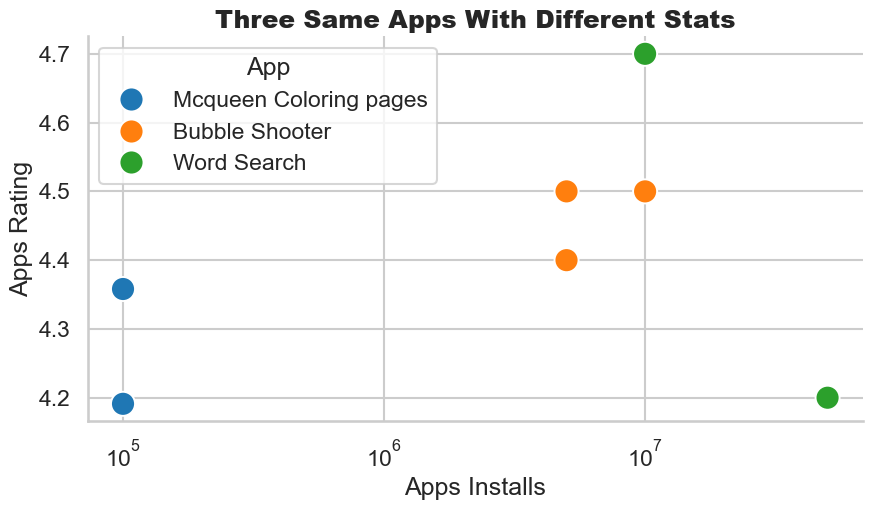

In [66]:

# Step: Filter apps with multiple entries (not exactly same)
duplicates = df_5[df_5.duplicated(['App'], keep=False)]
diff_stats = duplicates.drop_duplicates(subset=['App', 'Rating', 'Installs'])

# Step: Count repeated names and take top 3 most frequent
top_3_names = diff_stats['App'].value_counts().head(3).index
final = diff_stats[diff_stats['App'].isin(top_3_names)][['App','Installs','Rating']]
print(final.sort_values(by=['App'] , ascending=True))
plt.figure(figsize=(10, 5))
plt.title('Three Same Apps With Different Stats',fontweight = 800)
plt.xlabel('Apps Installs')
plt.ylabel('Apps Rating')
plt.xscale('log')
sns.set_context('talk')
sns.set_style('whitegrid')
sns.scatterplot(data = final , x = 'Installs' , y = 'Rating' , hue='App' ,s = 300)
sns.despine()
plt.show()
# final = final.groupby('App')
# # print(final)
# for x,y in final:
#     print(y)